In [1]:
import pandas as pd
import glob
from ast import literal_eval
import matplotlib.pyplot as plt
plt.style.use('dark_background')
pd.options.display.max_colwidth = 100
import nltk
from nltk.corpus import stopwords

### Concat all files together 

In [10]:
all_files = glob.glob("headlines_pages/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df['date'] = pd.to_datetime(df['date']) # sets format of "date" column as datetime
df = df[df['headline'].notna()].drop_duplicates().sort_values(by='date') 
df['keywords'] = df['keywords'].apply(literal_eval)
df

,headline,date,doc_type,material_type,section,keywords
4,What’s on TV Wednesday: A Linda Ronstadt Doc and ‘Doctor Who’,2020-01-01,article,News,NaN,"[Television, Movies]"
8,10 Electric Vehicles to Watch,2020-01-01,article,News,NaN,"[Electric and Hybrid Vehicles, Automobile Service and Charging Stations, Batteries]"
2,"Iran, Democrats, Carlos Ghosn: Your Friday Briefing",2020-01-03,article,briefing,NaN,[]
4,Tesla Reports Record Output as Elon Musk Achieves Goal,2020-01-03,article,News,NaN,"[Electric and Hybrid Vehicles, Company Reports, Factories and Manufacturing]"
6,"In a Burger World, Can Sweetgreen Scale Up?",2020-01-04,article,News,NaN,"[Restaurants, Salads]"
...,...,...,...,...,...,...
5,"As U.S. Races Ahead, Europe Frets About Battery Factory Subsidies",2023-05-31,article,News,NaN,"[Electric and Hybrid Vehicles, Batteries, Lithium (Metal), Factories and Manufacturing, Tax Cred..."
6,U.S. Proposes Requiring New Cars to Have Automatic Braking Systems,2023-05-31,article,News,NaN,"[Automobile Safety Features and Defects, Traffic Accidents and Safety, Automobiles, Regulation a..."
9,"Despite a Handshake, a ‘Thaw’ in U.S.-China Relations Seems Far From Reach",2023-06-01,article,News,NaN,"[United States International Relations, Defense and Military Forces, United States Defense and M..."
5,Who Is Liable for A.I. Creations?,2023-06-03,article,News,NaN,"[Artificial Intelligence, Law and Legislation]"


In [11]:
start_date = pd.to_datetime('2020-01-10')
end_date = pd.to_datetime('2023-05-26')

df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

df

,headline,date,doc_type,material_type,section,keywords
7,‘This Airplane Is Designed by Clowns’,2020-01-10,article,News,NaN,[]
1,‘Techlash’ Hits College Campuses,2020-01-11,article,News,NaN,"[Hiring and Promotion, Colleges and Universities, Computers and the Internet, your-feed-work, yo..."
4,The Week in Business: Flying Ubers and Pricey French Cheese,2020-01-12,article,News,NaN,"[Automobiles, Taxicabs and Taxicab Drivers]"
8,Dying Malls? This One Has Found a Way to Thrive,2020-01-14,article,News,NaN,"[Real Estate (Commercial), Shopping Centers and Malls]"
7,Happy Results Turned Up Everywhere You Looked,2020-01-17,article,News,NaN,"[Computers and the Internet, E-Commerce, Stocks and Bonds, Exercise, Mutual Funds, Company Repor..."
...,...,...,...,...,...,...
5,The DeSantis Delusion,2023-05-24,article,Op-Ed,NaN,"[Presidential Election of 2024, Primaries and Caucuses, United States Politics and Government, P..."
6,Your Wednesday Briefing,2023-05-24,article,News,NaN,[]
4,Ron DeSantis vs. the ‘Woke Mind Virus’,2023-05-25,article,Op-Ed,NaN,"[Presidential Election of 2024, Right-Wing Extremism and Alt-Right]"
1,Is a Debt Deal Nigh? The Market Sees Signs of Optimism.,2023-05-26,article,News,NaN,"[internal-storyline-no, Artificial Intelligence]"


### Run sentiment analysis

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Get the headline and keywords
    headline = row['headline']
    keywords = row['keywords']
    
    # Combine the headline and keywords into one string
    text = headline + ' ' + ' '.join(keywords)
    # Check if "s&p 500" is in the text
    if "tesla" not in text.lower():
        continue

    
    # Get the sentiment score for the text
    sentiment = sia.polarity_scores(text)['compound']
    # Add the sentiment score to the DataFrame
    df.at[index, 'sentiment'] = sentiment
# Add a new column to the DataFrame for the date of the article
df['article_date'] = pd.to_datetime(df['date']).dt.date

# Group the DataFrame by article date and aggregate the sentiment scores
sentiment_by_day = df.groupby('article_date')['sentiment'].mean()

df['week'] = pd.to_datetime(df['date']).dt.to_period('W')
sentiment_by_week = df.groupby('week')['sentiment'].mean()


df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
sentiment_by_month = df.groupby('month')['sentiment'].mean()


sentiment_by_week.to_csv('news.csv', header=True)


/var/folders/mx/692lnb091_x0tgfw7r9dsl3m0000gn/T/ipykernel_8269/2392794917.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, 'sentiment'] = sentiment
/var/folders/mx/692lnb091_x0tgfw7r9dsl3m0000gn/T/ipykernel_8269/2392794917.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['article_date'] = pd.to_datetime(df['date']).dt.date
/var/folders/mx/692lnb091_x0tgfw7r9dsl3m0000gn/T/ipykernel_8269/2392794917.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

### Sentiment by Day

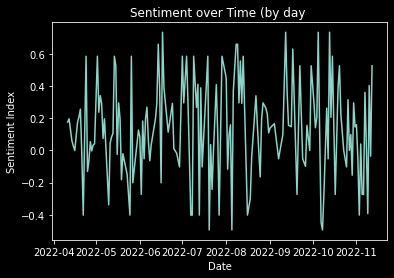

In [5]:
import matplotlib.pyplot as plt

plt.plot(sentiment_by_day.index, sentiment_by_day.values)
plt.xlabel('Date')
plt.ylabel('Sentiment Index')
plt.title('Sentiment over Time (by day ')
plt.show()


### Sentiment by Week

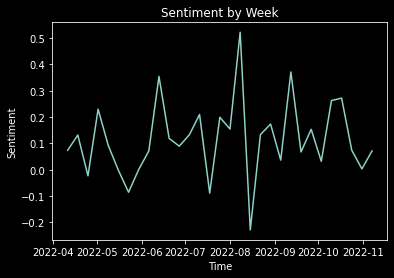

In [6]:
# plot sentiment by week with time as the x value
plt.plot(sentiment_by_week.index.to_timestamp(), sentiment_by_week.values)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Sentiment by Week')
plt.show()

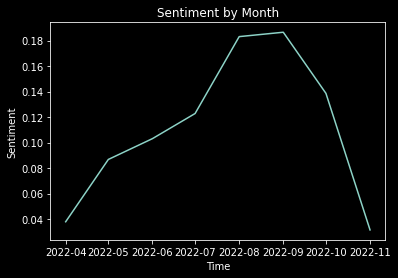

In [7]:
# plot sentiment by month with time as the x value
plt.plot(sentiment_by_month.index.to_timestamp(), sentiment_by_month.values)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Sentiment by Month')
plt.show()